In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig_dir = "../manuscript/figs/"

In [2]:
score_momo = pd.read_csv("../stmomo/logScoreMomo.csv", index_col=False)
score_momo  = score_momo[['forecast_horizon','log_score','model']].groupby(['forecast_horizon','model'], as_index = False).mean()

In [3]:
score_linear = pd.read_csv("../trainedModelsLinear/results/results_linear.csv")
score_linear['model'] = 'linear'
score_linear['log_score'] = - score_linear['log_score']
score_linear = score_linear[score_linear['latent_dim'] == 3]
score_linear  = score_linear[['forecast_horizon','log_score','model']].groupby(['forecast_horizon','model'], as_index = False).mean()

In [4]:
score_radial = pd.read_csv("../trainedModelsRadial/results/results_radial.csv")
score_radial['model'] = 'radial'
score_radial['log_score'] = - score_radial['log_score']
score_radial = score_radial[score_radial['latent_dim'] == 4]
score_radial = score_radial[score_radial['num_basis'] == 15]
score_radial  = score_radial[['forecast_horizon','log_score','model']].groupby(['forecast_horizon','model'], as_index = False).mean()

In [5]:
score_sat_naive = pd.read_csv("../trainedModelsLinear/results/results_naive_saturated.csv")
score_sat_naive['log_score'] = - score_sat_naive['log_score']
score_sat_naive = score_sat_naive[score_sat_naive['nn_layers'] == 1]
score_sat_naive = score_sat_naive[score_sat_naive['latent_dim'] == 1]
score_sat_naive = score_sat_naive[['first_year_train','last_year_train','forecast_horizon','log_score','model']]
score_sat_naive  = score_sat_naive[['forecast_horizon','log_score','model']].groupby(['model','forecast_horizon']).mean().reset_index()

score_sat = score_sat_naive[score_sat_naive['model'] == 'saturated']
score_naive = score_sat_naive[score_sat_naive['model'] == 'naive']

score_naive = score_naive.rename(columns={"log_score": "naive"})
score_naive = score_naive[['forecast_horizon','naive']]
score_sat = score_sat.rename(columns={"log_score": "saturated"})
score_sat = score_sat[['forecast_horizon','saturated']]

In [6]:
score = pd.concat([score_momo,score_linear,score_radial])
score = pd.merge(score, score_sat, on = ['forecast_horizon'])
score = pd.merge(score, score_naive, on = ['forecast_horizon'])
score['r2'] = (score['log_score']-score['naive'])/(score['saturated']-score['naive'])
score['model'].mask(score['model'] == 'LC', 'Lee-Carter', inplace=True)
score['model'].mask(score['model'] == 'linear', 'Linear', inplace=True)
score['model'].mask(score['model'] == 'radial', 'Radial', inplace=True)
score['model'].mask(score['model'] == 'PLAT', 'Plat', inplace=True)


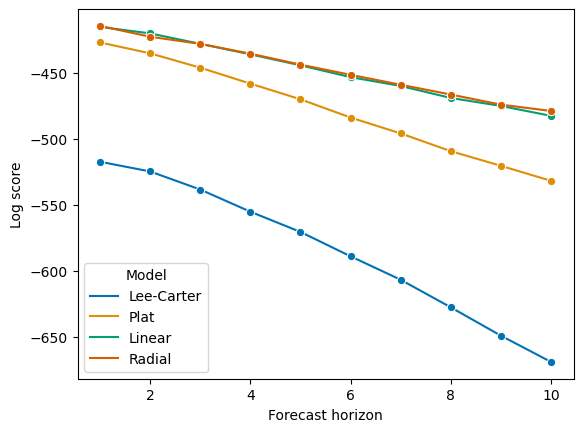

In [7]:
sns.set_palette("colorblind")

sns.lineplot(x = 'forecast_horizon', y = 'log_score', hue = 'model', data = score, marker = 'o')
plt.legend(title = "Model")
plt.ylabel('Log score')
plt.xlabel('Forecast horizon')

fig_path = fig_dir + 'model_comparison_log_score.pdf'

plt.savefig(fig_path, bbox_inches = 'tight', dpi=1200, format = 'pdf')


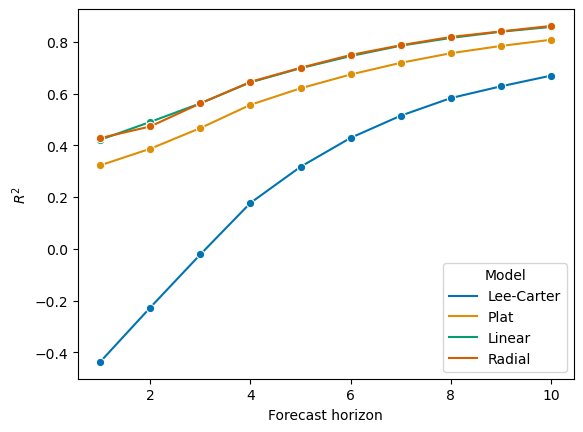

In [8]:
sns.set_palette("colorblind")

sns.lineplot(x = 'forecast_horizon', y = 'r2', hue = 'model', data = score, marker = 'o')
plt.legend(title = "Model")
plt.ylabel(r'$R^2$')
plt.xlabel('Forecast horizon')

fig_path = fig_dir + 'model_comparison_r2.pdf'
plt.savefig(fig_path, bbox_inches = 'tight', dpi=1200, format = 'pdf')

In [9]:
score[['r2','log_score','model']].groupby(['model'], as_index = False).mean()

,model,r2,log_score
0,Lee-Carter,0.263328,-584.644761
1,Linear,0.686027,-448.201464
2,Plat,0.609634,-477.633625
3,Radial,0.686744,-447.277378
